## Group_4: 
### Members:
1. Ignacio Huaroto
2. Victor Raico
3. Renato Rivera
4. Vanessa Azañedo
5. Greta Gongora

Each group must create their branch named group__ass_7_2024_2 (group_1_ass_7_2024_2) and save their results in the Assignment_7 folder. Name your JN like your branch.

1. Import the data located at this [link](https://github.com/alexanderquispe/Diplomado_PUCP/blob/main/_data/data_dengue_peru.csv). It has information on people infected with dengue at the district level for 2015 to 2021.
2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use [this code](https://stackoverflow.com/questions/35552874/get-first-letter-of-a-string-from-column).
3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI).
4. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI). For this task, you will have to aggregate shapefiles at the province level.
5. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI). For this task, you will have to aggregate shapefiles at the department level.
6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI). For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.






In [1]:
!pip install pandas
!pip install geopandas
!pip install mapclassify
!pip install matplotlib

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import geopandas as gpd

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### 1. Import data

In [2]:
#importing data  
file_path = '../../_data/data_dengue_peru.csv'  
# Use 'converters' to clean the 'Casos' column of commas  
dengue = pd.read_csv(file_path, converters={'Casos': lambda x: float(x.replace(',', '')) if x.strip() else None})

In [16]:
dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


### 2. Generate UBIGEO
Now it's time to generate the **UBIGEO for Deparments and Provinces** taking the first two and four numbers

In [3]:
# Ubigeo
## from numeric to string
dengue['Ubigeo'] = dengue['Ubigeo'].astype(str)

## adding a "0" to the cases with 5 digits
dengue['Ubigeo'] = dengue['Ubigeo'].apply(lambda x: x.zfill(6) if len(x) == 5 else x)

In [4]:
## creating Ubigeo for Departamento and Provincia

dengue['Ubigeo_Dep'] = dengue['Ubigeo'].str[:2] #Departamento
dengue['Ubigeo_Pro'] = dengue['Ubigeo'].str[:4] #Provincia

dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Dep,Ubigeo_Pro
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


### 3. Use geopandas to plot cases in 2021 by *district*
We need to use a continuous legend and indicate NA values

In [5]:
# Fist we load the shapefile using a relative path  
dpt_shp = gpd.read_file(r'..\..\_data\LIMITE_DISTRITAL_2020_INEI\INEI_LIMITE_DISTRITAL.shp')
dpt_shp.head

<bound method NDFrame.head of      CCDD    NOMBDEP CCPP    NOMBPROV CCDI      NOMBDIST          CAPITAL  \
0      06  CAJAMARCA   05   CONTUMAZA   04      GUZMANGO         GUZMANGO   
1      06  CAJAMARCA   11  SAN MIGUEL   05      EL PRADO         EL PRADO   
2      06  CAJAMARCA   11  SAN MIGUEL   09        NIEPOS           NIEPOS   
3      06  CAJAMARCA   11  SAN MIGUEL   10  SAN GREGORIO     SAN GREGORIO   
4      06  CAJAMARCA   12   SAN PABLO   03      SAN LUIS  SAN LUIS GRANDE   
...   ...        ...  ...         ...  ...           ...              ...   
1869   04   AREQUIPA   04    CASTILLA   04       CHACHAS          CHACHAS   
1870   04   AREQUIPA   04    CASTILLA   05  CHILCAYMARCA     CHILCAYMARCA   
1871   04   AREQUIPA   04    CASTILLA   06         CHOCO            CHOCO   
1872   04   AREQUIPA   04    CASTILLA   07    HUANCARQUI       HUANCARQUI   
1873   12      JUNIN   06      SATIPO   04      MAZAMARI             None   

      UBIGEO IDPROV  CODIGO  CNT_CCPP    DESC

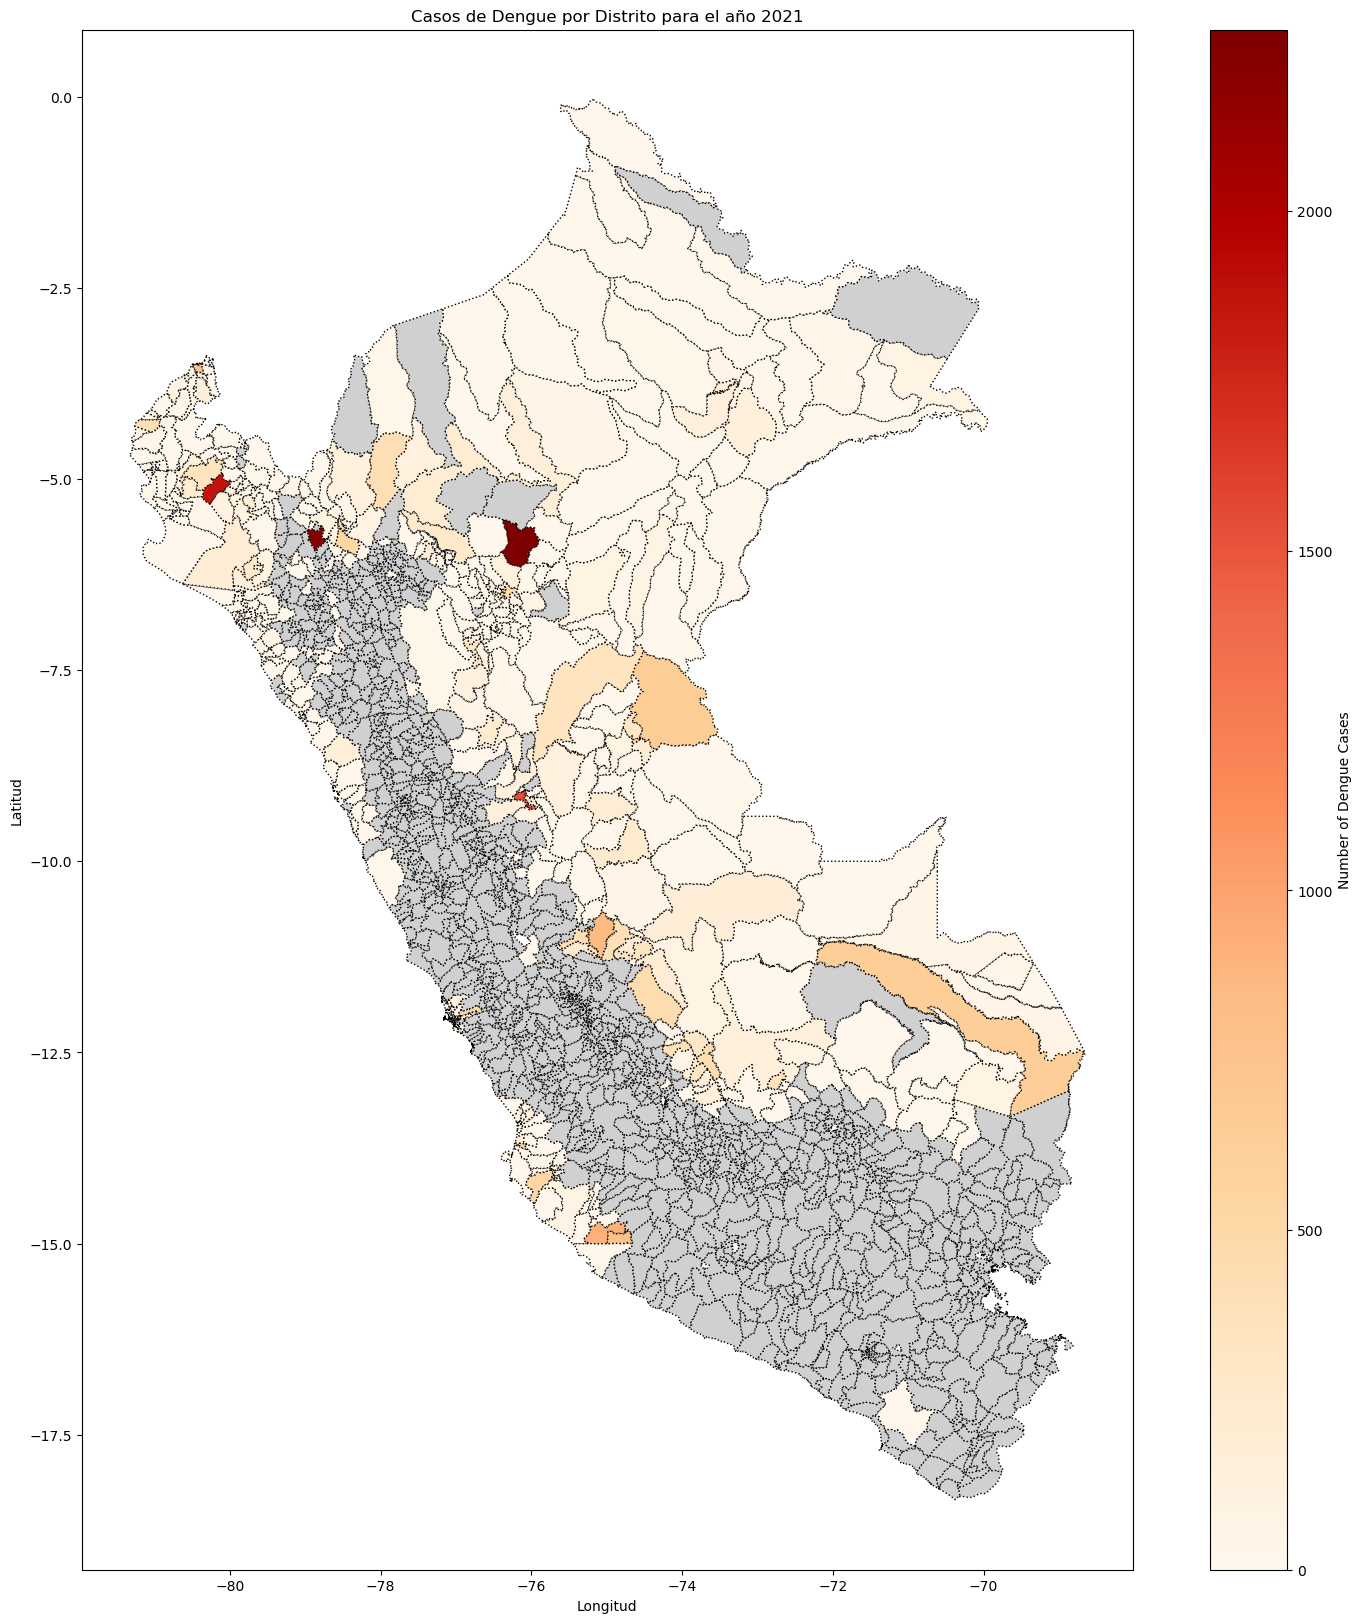

In [6]:
# Aggregate cases by district for the year 2021  
dengue_2021 = dengue[dengue['Año'] == 2021]

dengue_distrit_2021 = dengue_2021.groupby('Ubigeo')['Casos'].sum().reset_index()

# Merge the cases data with the districts geodataframe using the Ubigeo column
merge_dengue_dist_2021 = dpt_shp.merge(dengue_distrit_2021, left_on='UBIGEO', right_on='Ubigeo', how='left')

# Plot de casos de dengue por distrito en 2021
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
cmap = plt.cm.Reds  # Use the desired color 
# Using 'Cases' for plotting  
merge_dengue_dist_2021.plot(column='Casos', cmap='OrRd', ax=ax, edgecolor='black',
                            linestyle='dotted',  # Dotted lines for the edges
                            legend=True,
                            legend_kwds={'label': "Number of Dengue Cases", 'orientation': "vertical"},
                            missing_kwds={'color': '#D0D0D0', 'label': 'No data', 'edgecolor': 'black'})  # Show NA values in light grey  

# Add titles and labels  
plt.title('Casos de Dengue por Distrito para el año 2021')  
plt.xlabel('Longitud')  
plt.ylabel('Latitud')  
plt.show()



### 4. Use geopandas to plot cases in 2021 by *province*
We need to use a continuous legens and indicate NA values

In [7]:
# We will load the shapefile again but with another name  
prov_shp = gpd.read_file(r'..\..\_data\LIMITE_DISTRITAL_2020_INEI\INEI_LIMITE_DISTRITAL.shp')  
prov_shp.head

<bound method NDFrame.head of      CCDD    NOMBDEP CCPP    NOMBPROV CCDI      NOMBDIST          CAPITAL  \
0      06  CAJAMARCA   05   CONTUMAZA   04      GUZMANGO         GUZMANGO   
1      06  CAJAMARCA   11  SAN MIGUEL   05      EL PRADO         EL PRADO   
2      06  CAJAMARCA   11  SAN MIGUEL   09        NIEPOS           NIEPOS   
3      06  CAJAMARCA   11  SAN MIGUEL   10  SAN GREGORIO     SAN GREGORIO   
4      06  CAJAMARCA   12   SAN PABLO   03      SAN LUIS  SAN LUIS GRANDE   
...   ...        ...  ...         ...  ...           ...              ...   
1869   04   AREQUIPA   04    CASTILLA   04       CHACHAS          CHACHAS   
1870   04   AREQUIPA   04    CASTILLA   05  CHILCAYMARCA     CHILCAYMARCA   
1871   04   AREQUIPA   04    CASTILLA   06         CHOCO            CHOCO   
1872   04   AREQUIPA   04    CASTILLA   07    HUANCARQUI       HUANCARQUI   
1873   12      JUNIN   06      SATIPO   04      MAZAMARI             None   

      UBIGEO IDPROV  CODIGO  CNT_CCPP    DESC

In [8]:
# Aggregate cases by province for the year 2021  
dengue.sort_values(['Provincia', 'Año'], inplace=True)  # Assuming there is a 'Provincia' column  
cases_by_province = dengue[dengue['Año'] == 2021].groupby('Provincia', as_index=False)[['Casos']].sum()  

# Merge the shapefile with the dengue data based on province name  
prov_shp = prov_shp.merge(cases_by_province, left_on='NOMBPROV', right_on='Provincia', how='left')  

# Clean up duplicate columns  
# Keep only the necessary columns and rename them  
prov_shp = prov_shp[['NOMBPROV', 'geometry', 'Casos']]  # Keep NOMBPROV, geometry, and cases  
prov_shp.rename(columns={'NOMBPROV': 'Province', 'Casos': 'Casos'}, inplace=True)  

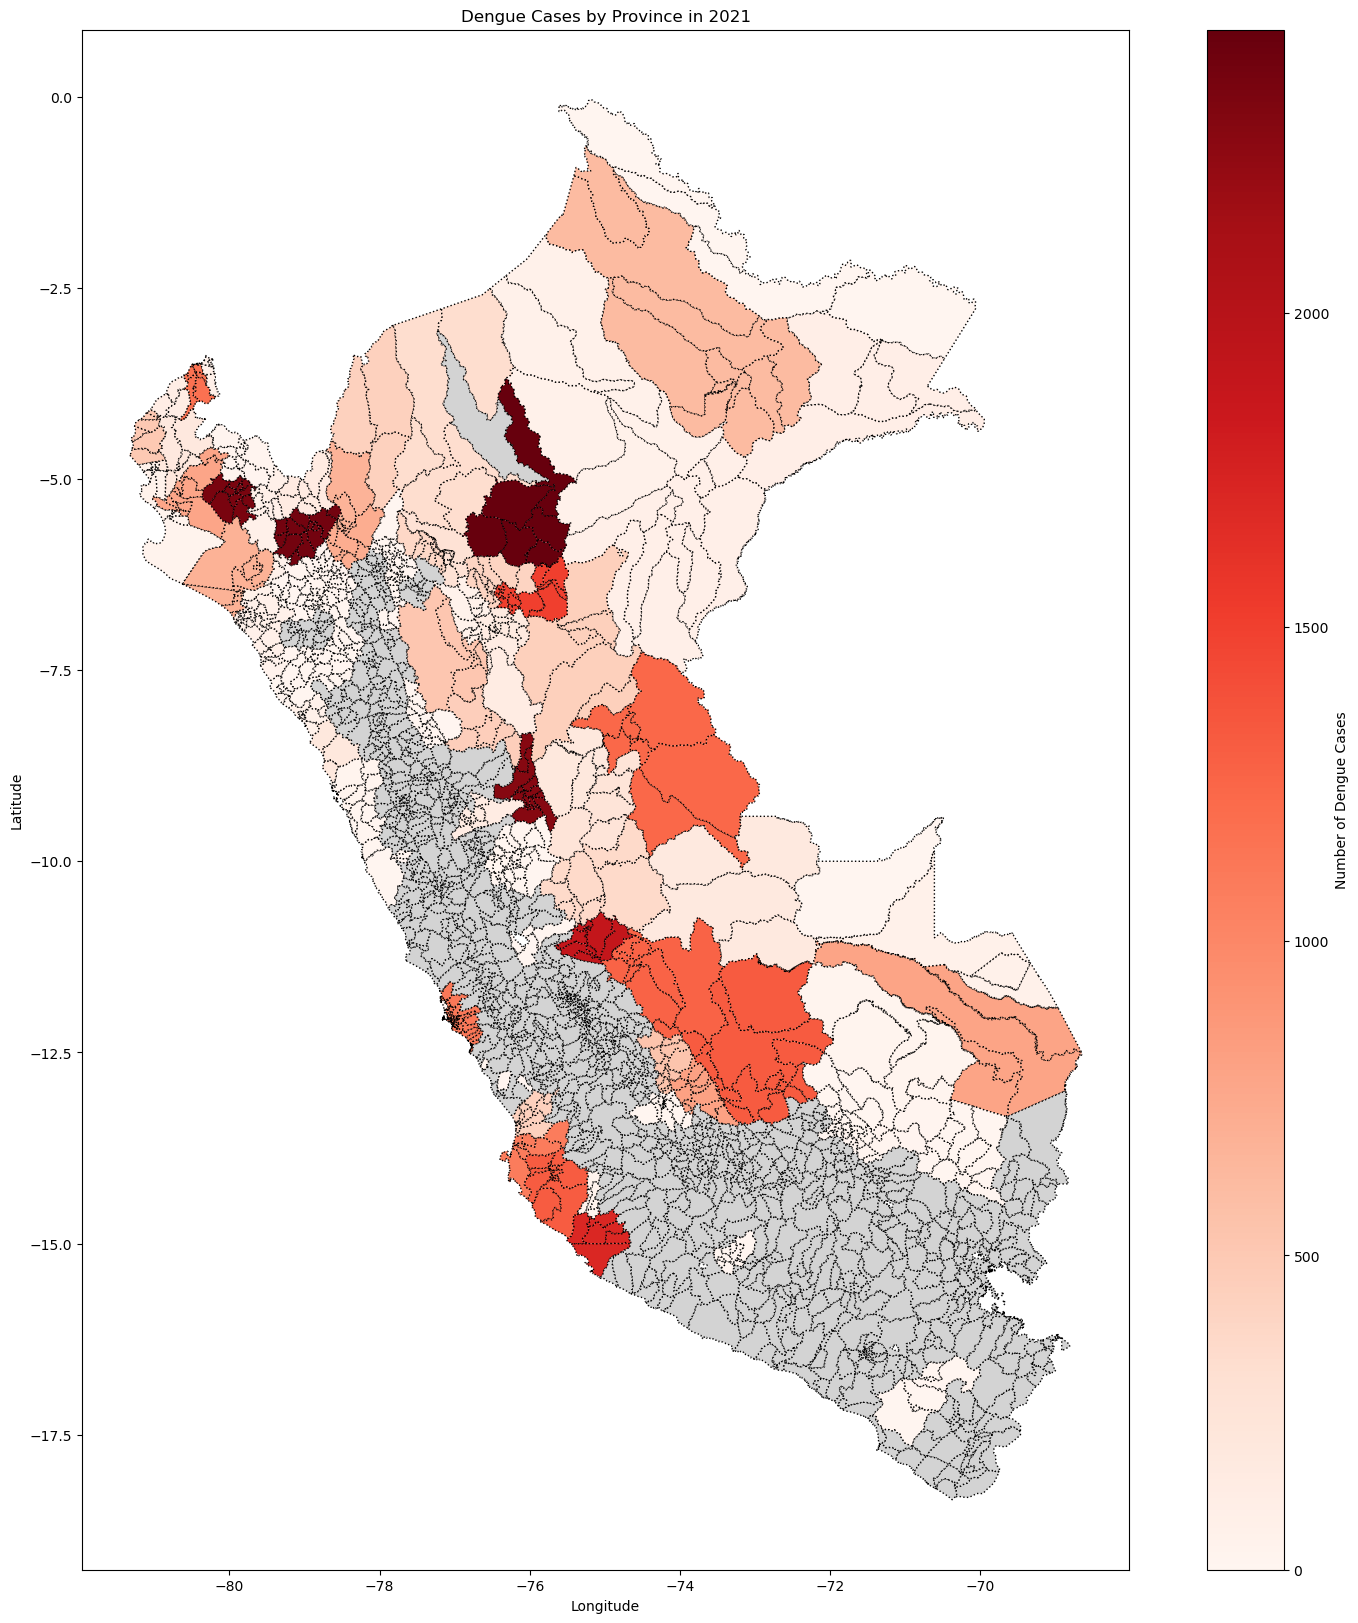

In [9]:
# Plotting  
fig, ax = plt.subplots(1, 1, figsize=(20, 20))  
cmap = plt.cm.Reds  # Use the desired color  

# Using 'Cases' for plotting  
prov_shp.plot(column='Casos', cmap=cmap, ax=ax, edgecolor='black',  
               linestyle='dotted',  # Dotted lines for the edges  
               legend=True,  
               legend_kwds={'label': "Number of Dengue Cases", 'orientation': "vertical"},  
               missing_kwds={'color': 'lightgrey', 'label': 'No data', 'edgecolor': 'black'})  # Show NA values in light grey  

# Add titles and labels  
plt.title('Dengue Cases by Province in 2021')  
plt.xlabel('Longitude')  
plt.ylabel('Latitude')  
plt.show()

### 5. Use geopandas to plot cases for all the years by *department*
We need to use subplots for each year and indicate NA values

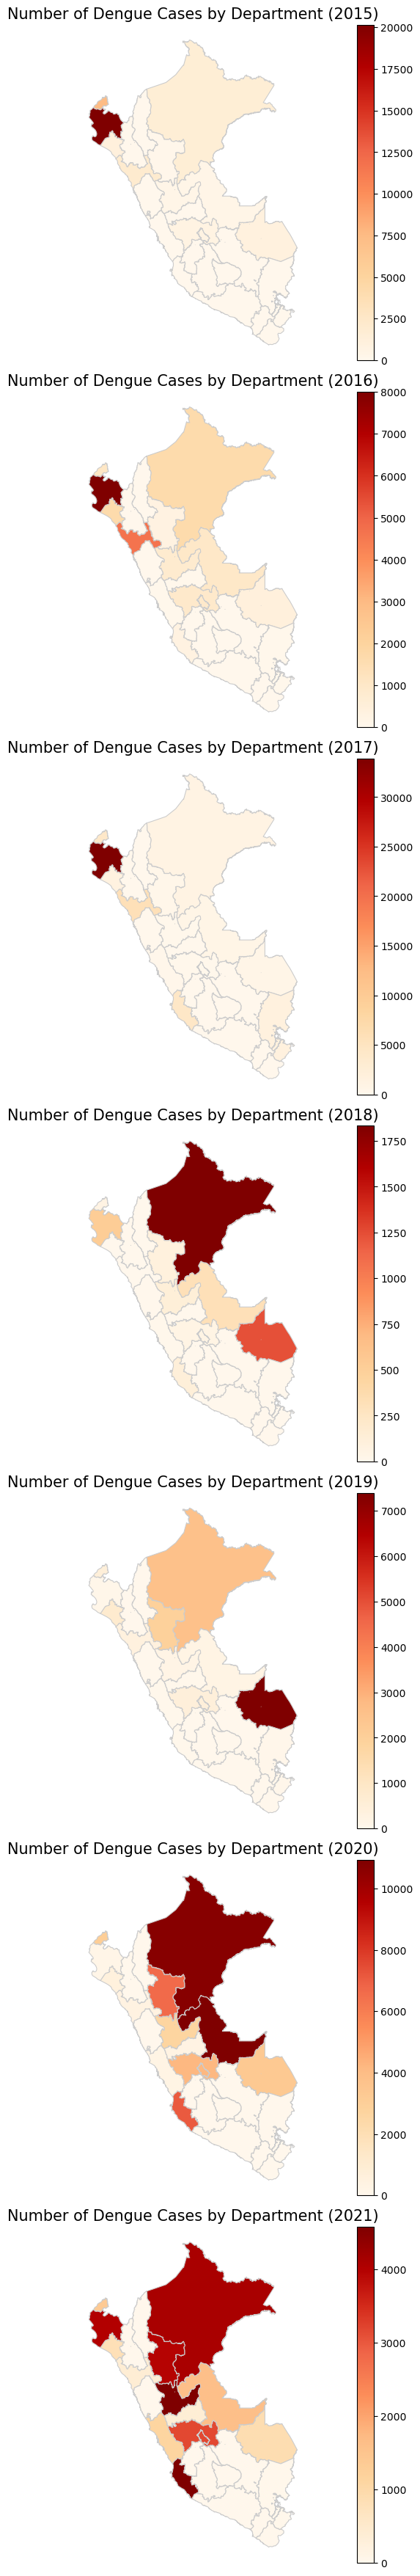

In [238]:
# URL of the shapefile
shp_url = 'https://github.com/alexanderquispe/Diplomado_PUCP/raw/main/_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp'

# Load the shapefile
df = gpd.read_file(shp_url)

# URL of the dengue data
dengue_url = 'https://raw.githubusercontent.com/alexanderquispe/Diplomado_PUCP/main/_data/data_dengue_peru.csv'
df_dengue = pd.read_csv(dengue_url, low_memory=False)

# Convert 'Casos' column to numeric
df_dengue['Casos'] = pd.to_numeric(df_dengue['Casos'], errors='coerce')

# Ensure 'Ubigeo' is a string before extracting department code
df_dengue['Ubigeo'] = df_dengue['Ubigeo'].astype(str)
df_dengue['DEPARTAMENTO'] = df_dengue['Ubigeo'].str[:2]  # Extract the first 2 digits for department level

# Aggregate dengue cases by department and year
cases_by_dept = df_dengue.groupby(['Año', 'DEPARTAMENTO'])['Casos'].sum().reset_index()

# Extract department code from shapefile for merging
df['DEPARTAMENTO'] = df['UBIGEO'].astype(str).str[:2]  # Extract the first 2 digits for department level

# Dissolve the shapefile by department level
dept_shp = df.dissolve(by='DEPARTAMENTO')

# Get unique years from the dengue data
years = sorted(df_dengue['Año'].unique())

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=len(years), figsize=(15, 5 * len(years)), constrained_layout=True)

# Plot each year
for i, year in enumerate(years):
    # Filter dengue cases for the specific year
    cases_for_year = cases_by_dept[cases_by_dept['Año'] == year]
    
    # Merge the aggregated cases with the shapefile
    merged_shp = dept_shp.merge(cases_for_year, left_on='DEPARTAMENTO', right_on='DEPARTAMENTO', how='left')
    
    # Convert 'Casos' to integer, handling NaN values
    merged_shp['Casos'] = merged_shp['Casos'].fillna(0).astype(int)
    
    # Plot
    ax = axes[i]
    merged_shp.plot(column='Casos', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                    missing_kwds={"color": "lightgrey", "label": "No Data"})
    ax.set_title(f'Number of Dengue Cases by Department ({year})', fontsize=15)
    ax.set_axis_off()

# Show the plot
plt.show()

### 6. Use geopandas to plot cases by the *department* for all 2021 quarters using subplots
We need to do every subplot for each quarter, a categorical legend with 5 bins and indicate NA values

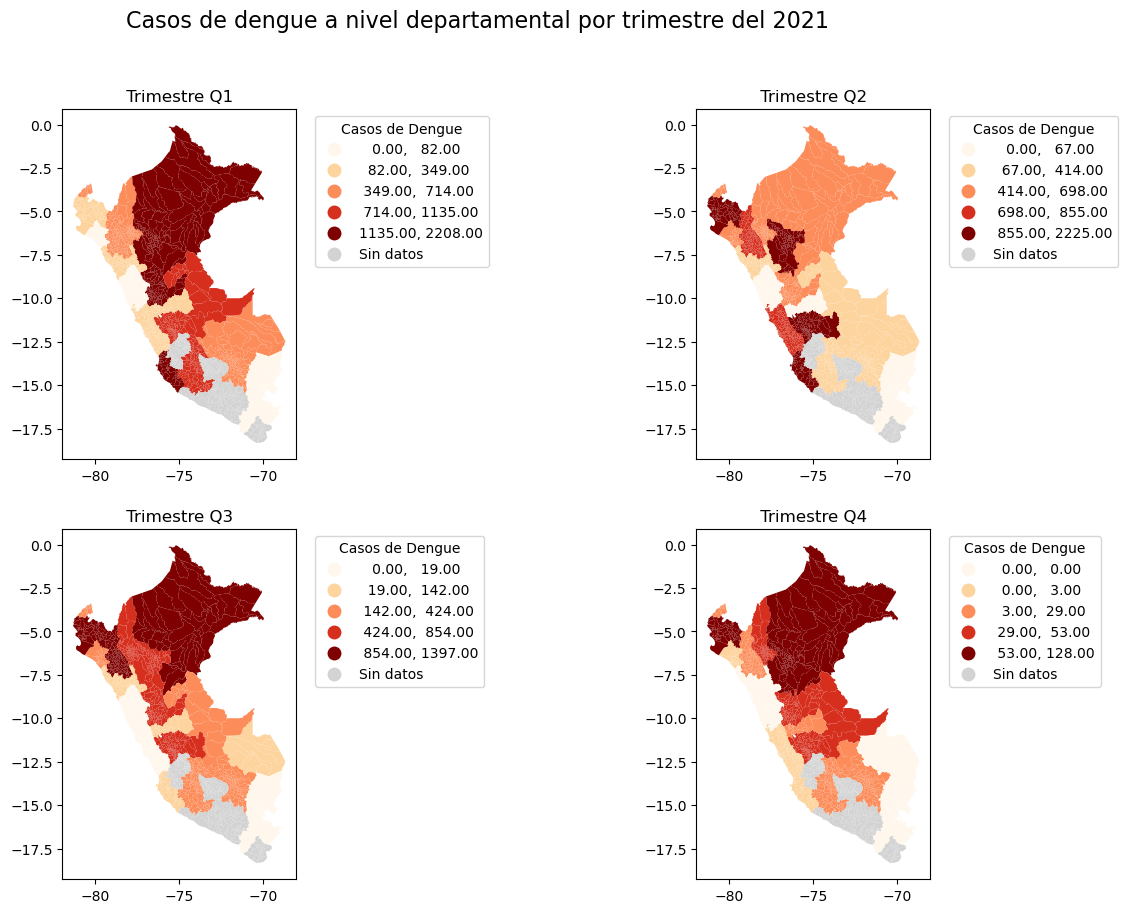

In [289]:
# Grouping weeks into quarters of the 2021 year's
#First we work with a copy
dengue_2021 = dengue_2021.copy() 
dengue_2021['Trimestre'] = pd.cut(dengue_2021['Semana'], bins=[0, 13, 26, 39, 52], labels=['Q1', 'Q2', 'Q3', 'Q4'])
# Grouping weeks into quarters and departments
data_dep_trimestre = dengue_2021.groupby(['Ubigeo_Dep', 'Trimestre'], observed=False)['Casos'].sum().reset_index()

# Crear un subplot for each quarter
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

trimestres = data_dep_trimestre['Trimestre'].unique()

for i, trimestre in enumerate(trimestres):
    # Filtrar los datos por trimestre
    data_dep_trim = data_dep_trimestre[data_dep_trimestre['Trimestre'] == trimestre]
    
    # Hacer el merge de los datos con el shapefile
    gdf_dep_trim = dpt_shp.merge(data_dep_trim, how='left', left_on='CCDD', right_on='Ubigeo_Dep')

    # Graficar el mapa con los casos y ajustar la leyenda
    gdf_dep_trim.plot(
        column='Casos', 
        cmap='OrRd', 
        legend=True, 
        ax=axes[i], 
        missing_kwds={'color': 'lightgrey', 'label': 'Sin datos'},  
        scheme='Quantiles', 
        k=5,
        legend_kwds={
            'bbox_to_anchor': (1.05, 1),  
            'loc': 'upper left',          
            'title': 'Casos de Dengue'     
        }
    )

    # Title for each subplot
    axes[i].set_title(f' Trimestre {trimestre} ')
#Casos de Dengue por Departamento en 2021
# Añadir el título general
plt.suptitle('Casos de dengue a nivel departamental por trimestre del 2021', fontsize=16)

# Ajustar el layout para evitar superposición de gráficos y el título general
#plt.tight_layout(rect=[0, 0, 1, 0.96])

# Fix the layout 
#plt.tight_layout()

# show the graph
plt.show()

